# Chemprop

**Tutorial by Kevin P. Greenman (Ph.D. Candidate, MIT Department of Chemical Engineering)**

This notebook is a tutorial that demonstrates how to use the Python interface of Chemprop, a package for molecular property prediction using directed message-passing neural networks (d-MPNNs). The source code of Chemprop is available on [GitHub](https://github.com/chemprop/chemprop), and a [Read the Docs page](https://chemprop.readthedocs.io/en/latest/) is also available with the full documentation. The GitHub repo contains instructions for installing Chemprop on a local machine, either from source or from PyPi using `pip`.

# Acknowledgements

Chemprop was first described in the following [paper](https://doi.org/10.1021/acs.jcim.9b00237):

```
Yang K, Swanson K, Jin W, Coley C, Eiden P, Gao H, Guzman-Perez A, Hopper T, Kelley B, Mathea M, Palmer A. Analyzing learned molecular representations for property prediction. Journal of chemical information and modeling. 2019 Jul 30; 59(8):3370-88. DOI: 10.1021/acs.jcim.9b00237.
```

Numerous researchers at MIT and in the open-source community have contributed to Chemprop to expand its functionality since then. In particular, I acknowledge the work of Lior Hirschfeld, Charles McGill, Esther Heid, Florence Vermeire, Max Liu, David Graff, Oscar Wu, Yunsie Chung, Yanfei Guan, Michael Forsuelo, and Gabriele Scalia. The PIs associated with this work include Regina Barzilay, Tommi Jaakkola, Klavs Jensen, Connor Coley, William Green, and Rafael Gómez-Bombarelli. The development of Chemprop is funded largely by the [Machine Learning for Pharmaceutical Discovery and Synthesis (MLPDS) Consortium](https://mlpds.mit.edu/).

# Applications

Chemprop has been applied in many subsequent publications, e.g.:
* [A Deep Learning Approach to Antibiotic Discovery](https://doi.org/10.1016/j.cell.2020.01.021)
* [Machine Learning of Reaction Properties via Learned Representations of the Condensed Graph of Reaction](https://doi.org/10.1021/acs.jcim.1c00975)
* [Predicting Infrared Spectra with Message Passing Neural Networks](https://doi.org/10.1021/acs.jcim.1c00055)
* [Group Contribution and Machine Learning Approaches to Predict Abraham Solute Parameters, Solvation Free Energy, and Solvation Enthalpy](https://doi.org/10.1021/acs.jcim.1c01103)
* [Multi-fidelity prediction of molecular optical peaks with deep learning](https://doi.org/10.1039/D1SC05677H)

# Setup

In [1]:
import os
import chemprop
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.decomposition import PCA

In [2]:
def plot_parity(y_true, y_pred, y_pred_unc=None):

    axmin = min(min(y_true), min(y_pred)) - 0.1*(max(y_true)-min(y_true))
    axmax = max(max(y_true), max(y_pred)) + 0.1*(max(y_true)-min(y_true))

    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)

    plt.plot([axmin, axmax], [axmin, axmax], '--k')

    plt.errorbar(y_true, y_pred, yerr=y_pred_unc, linewidth=0, marker='o', markeredgecolor='w', alpha=1, elinewidth=1)

    plt.xlim((axmin, axmax))
    plt.ylim((axmin, axmax))

    ax = plt.gca()
    ax.set_aspect('equal')

    at = AnchoredText(
    f"MAE = {mae:.2f}\nRMSE = {rmse:.2f}", prop=dict(size=10), frameon=True, loc='upper left')
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
    ax.add_artist(at)

    plt.xlabel('True')
    plt.ylabel('Chemprop Predicted')

    plt.show()

    return

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("chembl_2iok.csv",)

In [5]:
df

,Molecule ChEMBL ID,Smiles,pChEMBL Value
0,CHEMBL183388,CC[C@@H]1CCN(CCOc2ccc([C@@H]3Oc4ccc(O)cc4S[C@@...,9.05
1,CHEMBL187671,CC(C)(C)c1cc(-c2nc3ccc(O)cc3o2)ccc1O,5.30
2,CHEMBL304552,Oc1ccc([C@H]2Sc3cc(O)ccc3O[C@H]2c2ccc(OCCN3CCC...,9.10
3,CHEMBL184367,Oc1ccc([C@H]2Sc3cc(O)ccc3O[C@H]2c2ccc(OCCN3C4C...,9.22
4,CHEMBL368688,Oc1ccc([C@H]2Sc3cc(O)ccc3O[C@H]2c2ccc(OCCN3C4C...,9.05
...,...,...,...
648,CHEMBL4755319,CC/C(=C(/c1ccc(O)cc1)c1ccc(/C=C/C(=O)NCCCCCNC(...,6.80
649,CHEMBL191841,CSC1=C(c2ccc(O)cc2)C(=O)c2cc(O)ccc21,7.92
650,CHEMBL361258,COc1cc(O)c(Cl)c2cc(-c3ccc(O)cc3)oc12,6.94
651,CHEMBL367350,CC[C@@H](COc1ccc([C@@H]2Oc3ccc(O)cc3S[C@@H]2c2...,9.30


In [6]:
df

,Molecule ChEMBL ID,Smiles,pChEMBL Value
0,CHEMBL183388,CC[C@@H]1CCN(CCOc2ccc([C@@H]3Oc4ccc(O)cc4S[C@@...,9.05
1,CHEMBL187671,CC(C)(C)c1cc(-c2nc3ccc(O)cc3o2)ccc1O,5.30
2,CHEMBL304552,Oc1ccc([C@H]2Sc3cc(O)ccc3O[C@H]2c2ccc(OCCN3CCC...,9.10
3,CHEMBL184367,Oc1ccc([C@H]2Sc3cc(O)ccc3O[C@H]2c2ccc(OCCN3C4C...,9.22
4,CHEMBL368688,Oc1ccc([C@H]2Sc3cc(O)ccc3O[C@H]2c2ccc(OCCN3C4C...,9.05
...,...,...,...
648,CHEMBL4755319,CC/C(=C(/c1ccc(O)cc1)c1ccc(/C=C/C(=O)NCCCCCNC(...,6.80
649,CHEMBL191841,CSC1=C(c2ccc(O)cc2)C(=O)c2cc(O)ccc21,7.92
650,CHEMBL361258,COc1cc(O)c(Cl)c2cc(-c3ccc(O)cc3)oc12,6.94
651,CHEMBL367350,CC[C@@H](COc1ccc([C@@H]2Oc3ccc(O)cc3S[C@@H]2c2...,9.30


In [7]:
df.dropna(inplace=True)

In [8]:
df.reset_index(drop=True, inplace=True)

In [9]:
df

,Molecule ChEMBL ID,Smiles,pChEMBL Value
0,CHEMBL183388,CC[C@@H]1CCN(CCOc2ccc([C@@H]3Oc4ccc(O)cc4S[C@@...,9.05
1,CHEMBL187671,CC(C)(C)c1cc(-c2nc3ccc(O)cc3o2)ccc1O,5.30
2,CHEMBL304552,Oc1ccc([C@H]2Sc3cc(O)ccc3O[C@H]2c2ccc(OCCN3CCC...,9.10
3,CHEMBL184367,Oc1ccc([C@H]2Sc3cc(O)ccc3O[C@H]2c2ccc(OCCN3C4C...,9.22
4,CHEMBL368688,Oc1ccc([C@H]2Sc3cc(O)ccc3O[C@H]2c2ccc(OCCN3C4C...,9.05
...,...,...,...
644,CHEMBL4755319,CC/C(=C(/c1ccc(O)cc1)c1ccc(/C=C/C(=O)NCCCCCNC(...,6.80
645,CHEMBL191841,CSC1=C(c2ccc(O)cc2)C(=O)c2cc(O)ccc21,7.92
646,CHEMBL361258,COc1cc(O)c(Cl)c2cc(-c3ccc(O)cc3)oc12,6.94
647,CHEMBL367350,CC[C@@H](COc1ccc([C@@H]2Oc3ccc(O)cc3S[C@@H]2c2...,9.30


In [10]:
df.to_csv("output.csv")

# Train classification model

In [11]:

arguments = [
    '--data_path', 'output.csv',
    '--dataset_type', 'regression',
    '--save_dir', 'test_checkpoints_reg',
    '--save_smiles_splits',
    '--split_sizes', '0.7', '0.15', '0.15',
    '--num_folds', '2',



    '--smiles_columns', 'Smiles',
    '--epochs', '20',
    '--target_columns', 'pChEMBL Value',
    '--seed', '42',


]


args = chemprop.args.TrainArgs().parse_args(arguments)
mean_score, std_score = chemprop.train.cross_validate(args=args, train_func=chemprop.train.run_training)

Command line
python c:\Users\DELL\miniconda3\envs\chemprop_env310\lib\site-packages\ipykernel_launcher.py --f=c:\Users\DELL\AppData\Roaming\jupyter\runtime\kernel-v334552c7ae56358105518e61b14b7b562809ded74.json
Args
{'activation': 'ReLU',
 'adding_bond_types': True,
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_constraints': [],
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'atom_targets': [],
 'batch_size': 50,
 'bias': False,
 'bias_solvent': False,
 'bond_constraints': [],
 'bond_descriptor_scaling': True,
 'bond_descriptors': None,
 'bond_descriptors_path': None,
 'bond_descriptors_size': 0,
 'bond_features_size': 0,
 'bond_targets': [],
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': False,
 'config_path': None,
 'constraints_pa

# Predict from file

In [12]:
arguments = [
    '--test_path', 'test_checkpoints_reg/fold_0/test_smiles.csv',
    '--preds_path', 'test_preds_reg.csv',
    '--checkpoint_dir', 'test_checkpoints_reg',


]

args = chemprop.args.PredictArgs().parse_args(arguments)
preds = chemprop.train.make_predictions(args=args)

Loading training args
Setting molecule featurization parameters to default.
Loading data


98it [00:00, 16318.31it/s]
100%|██████████| 98/98 [00:00<00:00, 12292.65it/s]
c:\Users\DELL\miniconda3\envs\chemprop_env310\lib\site-packages\torch\utils\data\dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4 (`cpuset` is not taken into account), which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Validating SMILES
Test size = 98


  0%|          | 0/2 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".


 50%|█████     | 1/2 [00:36<00:36, 36.35s/it]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".


100%|██████████| 2/2 [01:09<00:00, 34.95s/it]

Saving predictions to test_preds_reg.csv
Elapsed time = 0:01:12


In [13]:
df = pd.read_csv('test_checkpoints_reg/fold_0/test_full.csv')
df['preds'] = [x[0] for x in preds]
df

,Smiles,pChEMBL Value,preds
0,CC1(c2ccc(/C=C/C(=O)O)cc2)c2ccc(O)cc2CCN1c1ccc...,6.92,7.356611
1,Cl.O=C(c1ccc(OCCN2CCCCC2)cc1)c1c(-c2ccc(O)cc2)...,8.70,7.690481
2,O=C(Cc1cccs1)Nc1nnc(COc2ccccc2)s1,4.43,5.142020
3,CC1(c2ccc(OCCN3CCCCCC3)cc2)c2ccc(O)cc2CCN1c1cc...,8.82,7.919879
4,Cc1c(OCCNCCCF)ncc(F)c1[C@@H]1c2[nH]c3ccccc3c2C...,9.37,8.617800
...,...,...,...
93,N#CCc1cc(O)c(Cl)c2cc(-c3ccc(O)cc3)oc12,6.20,6.355150
94,O=C(c1ccc(OCCN2CCCCC2)cc1)c1c(-c2ccc(O)cc2)sc2...,9.15,7.692703
95,O=C1CCC(=O)N1CCOc1ccc([C@@H]2Oc3cc(O)ccc3C3=C2...,8.21,6.368128
96,CC1=C2c3ccc(O)cc3CC2(Cc2ccccc2)CCC1=O,5.82,6.387447


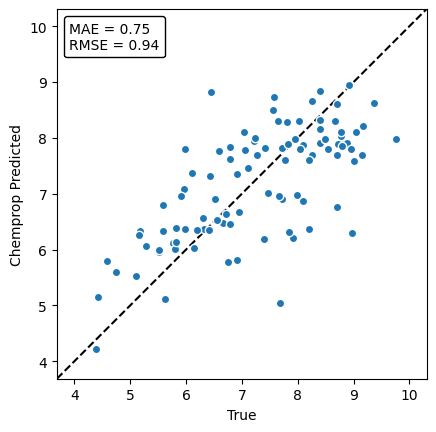

In [15]:
column = 'pChEMBL Value'
plot_parity(df[column], df.preds)

In [16]:
#for train

arguments = [
    '--test_path', 'test_checkpoints_reg/fold_0/train_smiles.csv',
    '--preds_path', 'train_preds_reg.csv',
    '--checkpoint_dir', 'test_checkpoints_reg',


]

args = chemprop.args.PredictArgs().parse_args(arguments)
preds = chemprop.train.make_predictions(args=args)

Loading training args
Setting molecule featurization parameters to default.
Loading data


454it [00:00, 30339.27it/s]
100%|██████████| 454/454 [00:00<00:00, 6884.01it/s]
c:\Users\DELL\miniconda3\envs\chemprop_env310\lib\site-packages\torch\utils\data\dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4 (`cpuset` is not taken into account), which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Validating SMILES
Test size = 454


  0%|          | 0/2 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".


 50%|█████     | 1/2 [01:41<01:41, 101.09s/it]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".


100%|██████████| 2/2 [03:13<00:00, 96.67s/it] 

Saving predictions to train_preds_reg.csv
Elapsed time = 0:03:16


In [17]:
df = pd.read_csv('test_checkpoints_reg/fold_0/train_full.csv')
df['preds'] = [x[0] for x in preds]
df

,Smiles,pChEMBL Value,preds
0,CCCC12CCC(=O)C(Br)=C1c1ccc3[nH]nnc3c1C2,5.48,5.617884
1,Cc1c(OCCNCCCF)ncc(F)c1[C@@H]1c2[nH]c3ccccc3c2C...,8.74,8.156232
2,COc1ccc(C2=C(c3ccc(O[C@H]4CCN(CCCF)C4)cc3)c3cc...,8.70,7.861379
3,COc1ccc(OCCNCCC(F)(F)F)cc1[C@@H]1c2[nH]c3ccccc...,8.85,8.874817
4,CC/C(=C(\c1ccccc1)c1ccc(OCCN(C)C)cc1)c1ccccc1,5.59,6.802469
...,...,...,...
449,CCCCC12CCC(=O)C(Br)=C1c1ccc3[nH]nnc3c1C2,6.85,5.861382
450,CC(=N)/C(C#N)=C(/O)CSc1nnc(COc2ccccc2Cl)o1,4.43,4.490069
451,CN(C)CCOc1ccc([C@@H]2Oc3cc(O)ccc3C3=C2c2ccccc2...,6.80,7.150096
452,C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CC[C...,8.00,7.984730


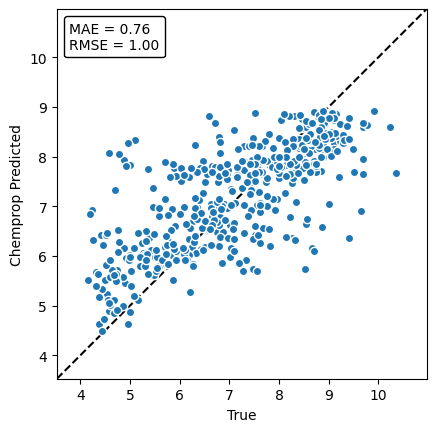

In [18]:
column = 'pChEMBL Value'
plot_parity(df[column], df.preds)

In [19]:
#for val

arguments = [
    '--test_path', 'test_checkpoints_reg/fold_0/val_smiles.csv',
    '--preds_path', 'val_preds_reg.csv',
    '--checkpoint_dir', 'test_checkpoints_reg',


]

args = chemprop.args.PredictArgs().parse_args(arguments)
preds = chemprop.train.make_predictions(args=args)

Loading training args
Setting molecule featurization parameters to default.
Loading data


97it [00:00, 48428.46it/s]
100%|██████████| 97/97 [00:00<00:00, 19483.17it/s]
c:\Users\DELL\miniconda3\envs\chemprop_env310\lib\site-packages\torch\utils\data\dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4 (`cpuset` is not taken into account), which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Validating SMILES
Test size = 97


  0%|          | 0/2 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".


 50%|█████     | 1/2 [00:34<00:34, 34.27s/it]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".


100%|██████████| 2/2 [01:19<00:00, 39.57s/it]

Saving predictions to val_preds_reg.csv
Elapsed time = 0:01:20


In [20]:
df = pd.read_csv('test_checkpoints_reg/fold_0/val_full.csv')
df['preds'] = [x[0] for x in preds]
df

,Smiles,pChEMBL Value,preds
0,Oc1ccc2c(c1)sc1c3cc(O)ccc3n(Cc3ccc(OCCN4CCCCCC...,8.48,7.874761
1,CN(C)CCOc1ccc([C@H]2Oc3ccccc3C3=C2c2ccc(O)cc2O...,5.87,7.085307
2,Cc1nocc1-c1nc2ccccc2n1-c1ccc(O)cc1,5.94,5.410195
3,Oc1cccc([C@H]2Sc3cc(O)ccc3O[C@H]2c2ccc(OCCN3CC...,9.05,8.105728
4,O=C(O)/C=C/c1ccc(Oc2c(-c3ccccc3C(F)F)sc3cc(O)c...,7.28,6.931206
...,...,...,...
92,CC[C@@H](COc1ccc([C@@H]2Oc3ccc(O)cc3S[C@@H]2c2...,9.30,8.335575
93,O=C1C(c2ccc(O)cc2)=C(c2ccccc2)c2cc(O)ccc21,8.00,6.413346
94,CC1(c2ccc(OCCN3CCCCC3)cc2)c2ccc(O)cc2CCN1c1ccc...,9.15,7.853039
95,Oc1ccc(C2Cc3ccc(O)cc3N(CC3CC3)C2)cc1,5.25,7.744748


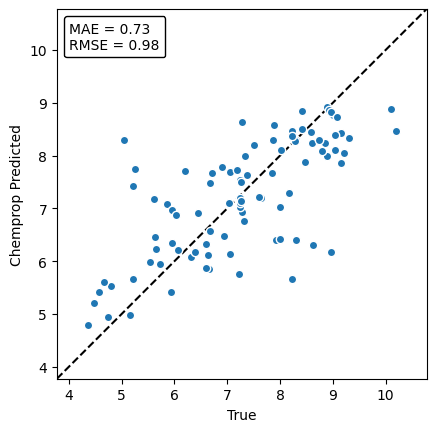

In [21]:
column = 'pChEMBL Value'
plot_parity(df[column], df.preds)

# Predict from external list - list of compounds generated

In [23]:
unique = pd.read_csv('uda_dataset.csv')

In [24]:
unique

,Names,Smiles
0,"Benzene, 1-ethyl-2-methyl-",CCC1=CC=CC=C1C
1,"Bicyclo[3.1.0]hexane, 4-methylene-1-(1-methyle...",CC(C)C12CCC(=C)C1C2
2,"Bicyclo[3.1.0]hexane, 4-methylene-1-(1-methyle...",CC(C)C12CCC(=C)C1C3
3,Decane,CCCCCCCCCC
4,"Benzene, 1,2,4-trimethyl-",CC1=CC(=C(C=C1)C)C
5,Decyl pentyl ether,CCCCCCCCCCOCCCCC
6,"Bicyclo[3.1.0]hexane, 4-methylene-1-(1-methyle...",CC(C)C12CCC(=C)C1C2
7,Eucalyptol,CC1(C2CCC(O1)(CC2)C)C
8,2-Tolyloxirane,CC1=CC=CC=C1C2CO2
9,.gamma.-Terpinene,CC1=CCC(=CC1)C(C)C


In [26]:
unique.drop_duplicates(inplace=True, subset='Smiles')

In [27]:
unique

,Names,Smiles
0,"Benzene, 1-ethyl-2-methyl-",CCC1=CC=CC=C1C
1,"Bicyclo[3.1.0]hexane, 4-methylene-1-(1-methyle...",CC(C)C12CCC(=C)C1C2
2,"Bicyclo[3.1.0]hexane, 4-methylene-1-(1-methyle...",CC(C)C12CCC(=C)C1C3
3,Decane,CCCCCCCCCC
4,"Benzene, 1,2,4-trimethyl-",CC1=CC(=C(C=C1)C)C
5,Decyl pentyl ether,CCCCCCCCCCOCCCCC
7,Eucalyptol,CC1(C2CCC(O1)(CC2)C)C
8,2-Tolyloxirane,CC1=CC=CC=C1C2CO2
9,.gamma.-Terpinene,CC1=CCC(=CC1)C(C)C
10,"Bicyclo[3.1.0]hexan-2-ol, 2-methyl-5-(1-methyl...",CC(C)[C@@]12CC[C@@]([C@@H]1C2)(C)O


In [28]:
unique.to_csv('unique_without_duplicate.csv', index=False)

In [29]:
arguments = [
    '--test_path', 'unique_without_duplicate.csv',
    '--preds_path', 'unique_without_duplicate.csv',
    '--checkpoint_dir', 'test_checkpoints_reg',
    '--smiles_columns', 'Smiles',


]

args = chemprop.args.PredictArgs().parse_args(arguments)
preds = chemprop.train.make_predictions(args=args)

Loading training args
Setting molecule featurization parameters to default.
Loading data


53it [00:00, 52865.19it/s]
100%|██████████| 53/53 [00:00<00:00, 52991.21it/s]
[23:40:04] SMILES Parse Error: unclosed ring for input: 'CC(C)C12CCC(=C)C1C3'
c:\Users\DELL\miniconda3\envs\chemprop_env310\lib\site-packages\torch\utils\data\dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4 (`cpuset` is not taken into account), which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Validating SMILES
Test size = 52


  0%|          | 0/2 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".


 50%|█████     | 1/2 [00:39<00:39, 39.96s/it]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".


100%|██████████| 2/2 [01:16<00:00, 38.35s/it]

Saving predictions to unique_without_duplicate.csv
Elapsed time = 0:01:17


In [30]:
df = pd.read_csv('unique_without_duplicate.csv')
#df['preds'] = [x[0] for x in preds]
df

,Names,Smiles,pChEMBL Value
0,"Benzene, 1-ethyl-2-methyl-",CCC1=CC=CC=C1C,6.956566391469192
1,"Bicyclo[3.1.0]hexane, 4-methylene-1-(1-methyle...",CC(C)C12CCC(=C)C1C2,5.213442747571496
2,"Bicyclo[3.1.0]hexane, 4-methylene-1-(1-methyle...",CC(C)C12CCC(=C)C1C3,Invalid SMILES
3,Decane,CCCCCCCCCC,8.897539572547888
4,"Benzene, 1,2,4-trimethyl-",CC1=CC(=C(C=C1)C)C,6.760738846760674
5,Decyl pentyl ether,CCCCCCCCCCOCCCCC,8.921342035503017
6,Eucalyptol,CC1(C2CCC(O1)(CC2)C)C,5.58624147449286
7,2-Tolyloxirane,CC1=CC=CC=C1C2CO2,7.568739381201305
8,.gamma.-Terpinene,CC1=CCC(=CC1)C(C)C,5.89666769640071
9,"Bicyclo[3.1.0]hexan-2-ol, 2-methyl-5-(1-methyl...",CC(C)[C@@]12CC[C@@]([C@@H]1C2)(C)O,5.643576021799419


In [41]:
# Convert the 'pChEMBL Value' column to numeric
df['pChEMBL Value'] = pd.to_numeric(df['pChEMBL Value'], errors='coerce')

# Define your activity function
def activity(value):
    if value >= 6.5:
        return 1
    else:
        return 0

# Apply the function
df['value'] = df['pChEMBL Value'].apply(activity)


In [39]:
print(df.columns)

Index(['Names', 'Smiles', 'pChEMBL Value'], dtype='object')


In [42]:
df['value'].value_counts()

value
0    29
1    24
Name: count, dtype: int64

In [43]:
df_to_dock = df[df['value'] == 1]

In [44]:
df_to_dock.reset_index(drop= True, inplace=True)

In [45]:
df_to_dock

,Names,Smiles,pChEMBL Value,value
0,"Benzene, 1-ethyl-2-methyl-",CCC1=CC=CC=C1C,6.956566,1
1,Decane,CCCCCCCCCC,8.897540,1
2,"Benzene, 1,2,4-trimethyl-",CC1=CC(=C(C=C1)C)C,6.760739,1
3,Decyl pentyl ether,CCCCCCCCCCOCCCCC,8.921342,1
4,2-Tolyloxirane,CC1=CC=CC=C1C2CO2,7.568739,1
5,"Benzene, 4-ethyl-1,2-dimethyl-",CCC1=CC(=C(C=C1)C)C,6.870467,1
6,"Benzene, 2-ethyl-1,3-dimethyl-",CCC1=C(C=CC=C1C)C,6.917425,1
7,1-Methyl-1-silabenzocyclobutene,C[Si]1CC2=CC=CC=C21,7.279366,1
8,Undecane,CCCCCCCCCCC,8.939741,1
9,Linalool,CC(=CCCC(C)(C=C)O)C,6.608486,1


In [46]:
df_to_dock.to_csv('filtered_by_ML_upNext_PAINS.csv', index=False)

# EXTERNAL VALIDATION